# __Credit Card Routing System__

This is the main notebook of the project and is divided by _ parts:
- Exploratory Data Analysis
- Data Cleansing

### Main Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data

In [8]:
# Thes lines are responsible for loading the Excel dataset and printing the head
df = pd.read_excel('data/PSP_Jan_Feb_2019.xlsx')
print(df.head())

### Exploratory Data Analysis

__Histogram of Distribution of Transactions__

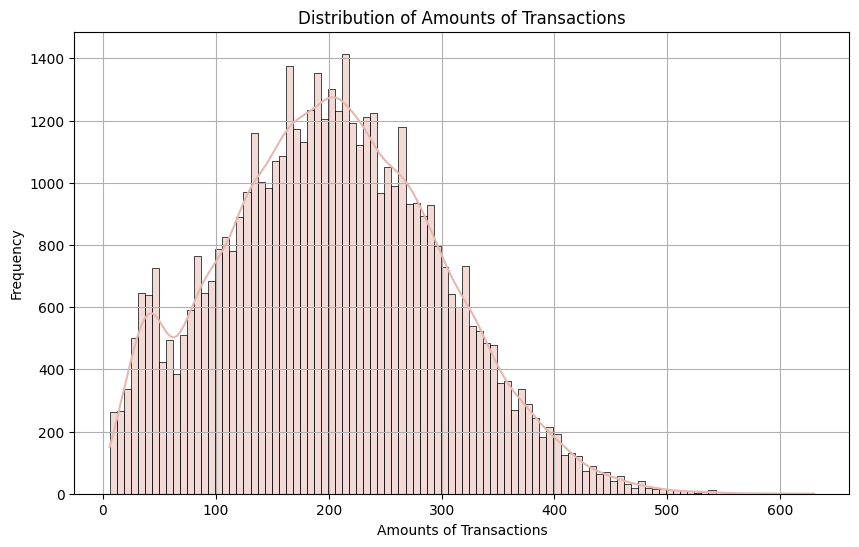

In [22]:
# This snippet is for plotting the histogram of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=100, kde=True, color='#e6b8af')
plt.title('Distribution of Amounts of Transactions')
plt.grid(True)
plt.xlabel('Amounts of Transactions')
plt.ylabel('Frequency')
plt.show()

__Bar Chart with the Success Rate by 3D-Secure Status__

C:\Users\imildo.sitoe\AppData\Local\Temp\ipykernel_19500\1449011408.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='3D_secured', y='success', data=success_rates, palette='coolwarm')


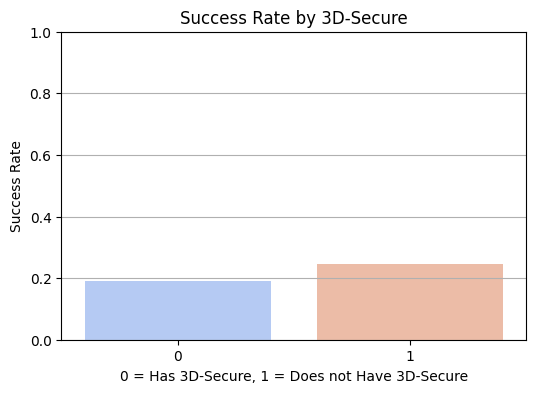

In [31]:
# This snippet is for calculating the success rate by 3D-secure status
success_rates = df.groupby('3D_secured')['success'].mean().reset_index()

# Plot success rates by 3D-secured status
plt.figure(figsize=(6, 4))
sns.barplot(x='3D_secured', y='success', data=success_rates, palette='coolwarm')
plt.title('Success Rate by 3D-Secure')
plt.xlabel('0 = Has 3D-Secure, 1 = Does not Have 3D-Secure')
plt.ylabel('Success Rate')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

__Bar Chart with the Transaction Success Rates (by PSP)__

C:\Users\imildo.sitoe\AppData\Local\Temp\ipykernel_19500\3707448014.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PSP', y='success', data=psp_success_rates, palette='viridis')


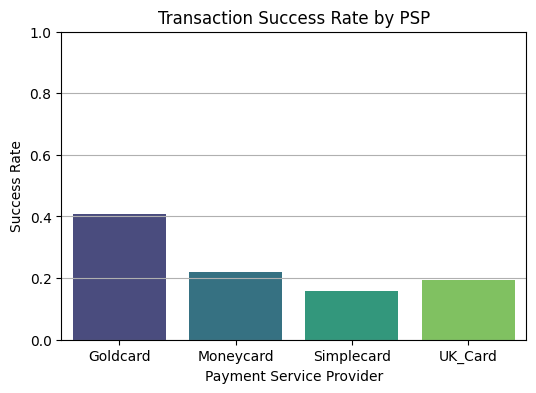

In [32]:
# Line to calculate the success rates per each PSP
psp_success_rates = df.groupby('PSP')['success'].mean().reset_index()

# Snippet to plot success rates by PSP
plt.figure(figsize=(6, 4))
sns.barplot(x='PSP', y='success', data=psp_success_rates, palette='viridis')
plt.title('Transaction Success Rate by PSP')
plt.xlabel('Payment Service Provider')
plt.ylabel('Success Rate')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

__Retry Patterns__

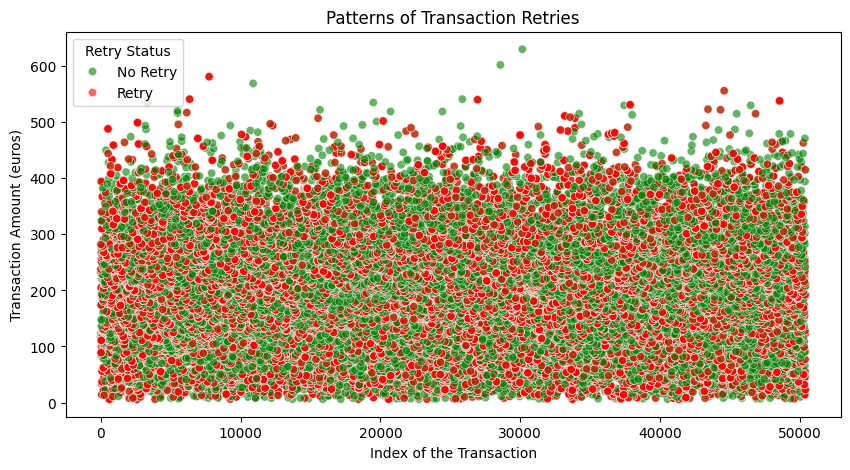

In [33]:
# Convert timestamp to datetime format
df['tmsp'] = pd.to_datetime(df['tmsp'])

# Sort values for easier comparison
df = df.sort_values(by=['country', 'amount', 'tmsp'])

# Identify retries (transactions within 1 minute with the same amount & country)
df['retry'] = (df.groupby(['country', 'amount'])['tmsp'].diff().dt.total_seconds() <= 60).astype(int)

# Define color mapping explicitly
palette = {0: 'green', 1: 'red'}

# Plot retry patterns
plt.figure(figsize=(10, 5))
scatter = sns.scatterplot(x=df.index, y=df['amount'], hue=df['retry'], data=df, palette=palette, alpha=0.6)

# Set legend labels manually
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=["No Retry", "Retry"], title="Retry Status")

plt.title('Patterns of Transaction Retries')
plt.xlabel('Index of the Transaction')
plt.ylabel('Transaction Amount (euros)')
plt.show()